# Лабораторная работа №3
### Дьячков Вадим, 33501/4

### Инициализация окружения

In [1]:
%matplotlib inline
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits
from scipy.ndimage.interpolation import rotate, shift
from scipy.io import savemat

np.random.seed(42)
sns.set(font_scale=1.25)

## №8. Многомерные образы

### Задание 1

Для задачи классификации будем использовать набор, встроенный в библиотеку scikit для языка программирования Python. Набор включает в себя 1797 черно-белых изображений рукописных цифр (то есть 10 классов) размером $8 \times 8$ пикселей.

(1797, 64)


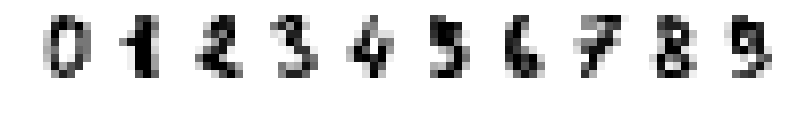

In [2]:
digits = load_digits() # 8x8 pictures
print(digits.data.shape)

fig = plt.figure(figsize=(8, 2), dpi=120)
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r)
    plt.axis('off')
plt.savefig('../pics/5_1_1.png', bbox_inches='tight')
plt.show() 

In [3]:
savemat('matlab/8.mat', mdict={'P': digits.data, 'T': digits.target})

### Задание 2

Примеры образов, зашумленных с разной степенью интенсивности относительно исходных

In [4]:
noisy = np.empty_like(digits.data);

i = 0
for d in digits.data:
    k = np.random.randint(1, 12)
    noisy[i,:] = digits.data[i] + np.random.randint(-k, k, size=64)
    noisy[i,noisy[i,:] < 0] = 0
    i += 1;

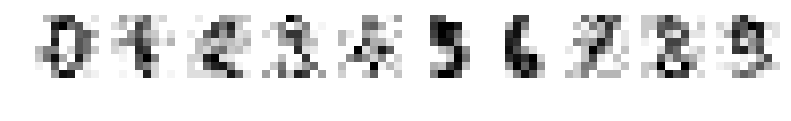

In [5]:
fig = plt.figure(figsize=(8, 2), dpi=120)
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    plt.imshow(noisy[i].reshape((8,8)), cmap=plt.cm.gray_r)
    plt.axis('off')
plt.savefig('../pics/5_1_2.png', bbox_inches='tight')
plt.show()

In [6]:
savemat('matlab/8_noisy.mat', mdict={'P_noisy': noisy, 'T': digits.target})

Примеры образов, имеющих геометрические искажения (поворот на различный угол).

In [7]:
rot = np.empty_like(digits.data);

i = 0
for d in digits.data:
    alpha = np.random.randint(-60, 60)
    rot[i,:] = rotate(digits.images[i], alpha, reshape=False, order=0).flatten()
    i += 1;

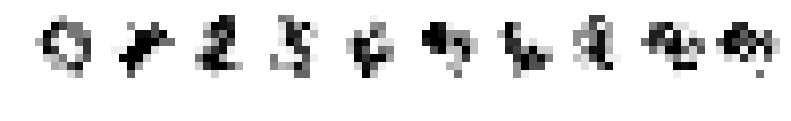

In [8]:
fig = plt.figure(figsize=(8, 2), dpi=120)
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    plt.imshow(rot[i].reshape((8,8)), cmap=plt.cm.gray_r)
    plt.axis('off')
plt.savefig('../pics/5_1_3.png', bbox_inches='tight')
plt.show()

In [9]:
savemat('matlab/8_rotate.mat', mdict={'P_rotate': rot, 'T': digits.target})

Образы, являющиеся некоторой частью от исходных.

In [10]:
shi = np.empty_like(digits.data);

i = 0
for d in digits.data:
    s = np.random.randint(-2, 2)
    shifted = shift(digits.images[i], s, prefilter=False, order=0)
    alpha = 0 #np.random.randint(-30, 30)
    rotated = rotate(shifted, alpha, reshape=False, prefilter=False, order=0)
    shi[i,:] = rotated.flatten()
    i += 1;

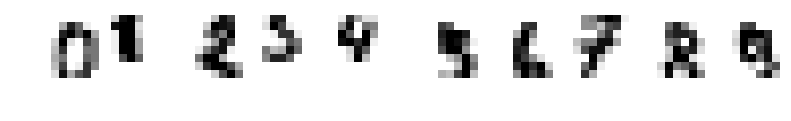

In [11]:
fig = plt.figure(figsize=(8, 2), dpi=120)
for i in range(10):
    fig.add_subplot(1, 10, i + 1)
    plt.imshow(shi[i].reshape((8,8)), cmap=plt.cm.gray_r)
    plt.axis('off')
plt.savefig('../pics/5_1_4.png', bbox_inches='tight')
plt.show()

In [12]:
savemat('matlab/8_shift.mat', mdict={'P_shift': shi, 'T': digits.target})